### Outlier Factors for Device Profiling

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline

# df = pd.read_csv('../../../diploma/multi-source-syber-security-events/flows.txt', header=None, nrows=100000)

# df.columns = ['time', 'duration', 'source computer', 'source port', 'destination computer', 
#              'destination port', 'protocol', 'packet count', 'byte count']

df = pd.read_csv('../../../diploma/generated_data/500_500000_1-100_True_C4_7.txt', header=None)

df.columns = ['time', 'source computer', 'byte count']

df.index = df['time']
df.drop(columns=['time'],inplace=True)
df.sort_index(inplace=True)
df.head()

,source computer,byte count
time,,
1,C74,130
1,C423,104
1,C174,127
1,C174,102
1,C422,122


In [10]:
# or try a simple generated dataset
len(df)

50003

In [11]:
from sklearn.preprocessing import MinMaxScaler

def scale(x):
    return np.log(x + 1)
   

class customScaler():
    def __init__(self, feature_range=(1,100)):
        self.feature_range = feature_range
    
    def fit(self, x):
        scaled_data = scale(x)
        self.scaler = MinMaxScaler(feature_range=self.feature_range)
        self.scaler.fit(scaled_data)

    def transform(self, data):
        scaled_data = scale(data)
        transformed = self.scaler.transform(scaled_data).astype(int)
        return np.array(transformed, dtype=np.int64)

In [12]:
from helper import group_data

scaler = customScaler()

groupped_data, hosts = group_data(df, size_of_bin_seconds=10, doScale=True, scaler=scaler)

In [13]:
from emClustering import OnlineEM
from plots import plot_points, plot_results

In [14]:
from helper import get_random_initialize_lamdas

mixtures = 10

# random initialization
onlineEM = OnlineEM([1/mixtures]*mixtures, get_random_initialize_lamdas(groupped_data.values[:,:-1], number_of_mixtures=mixtures), 200, n_clusters=8)
onlineEM.fit(groupped_data.values)

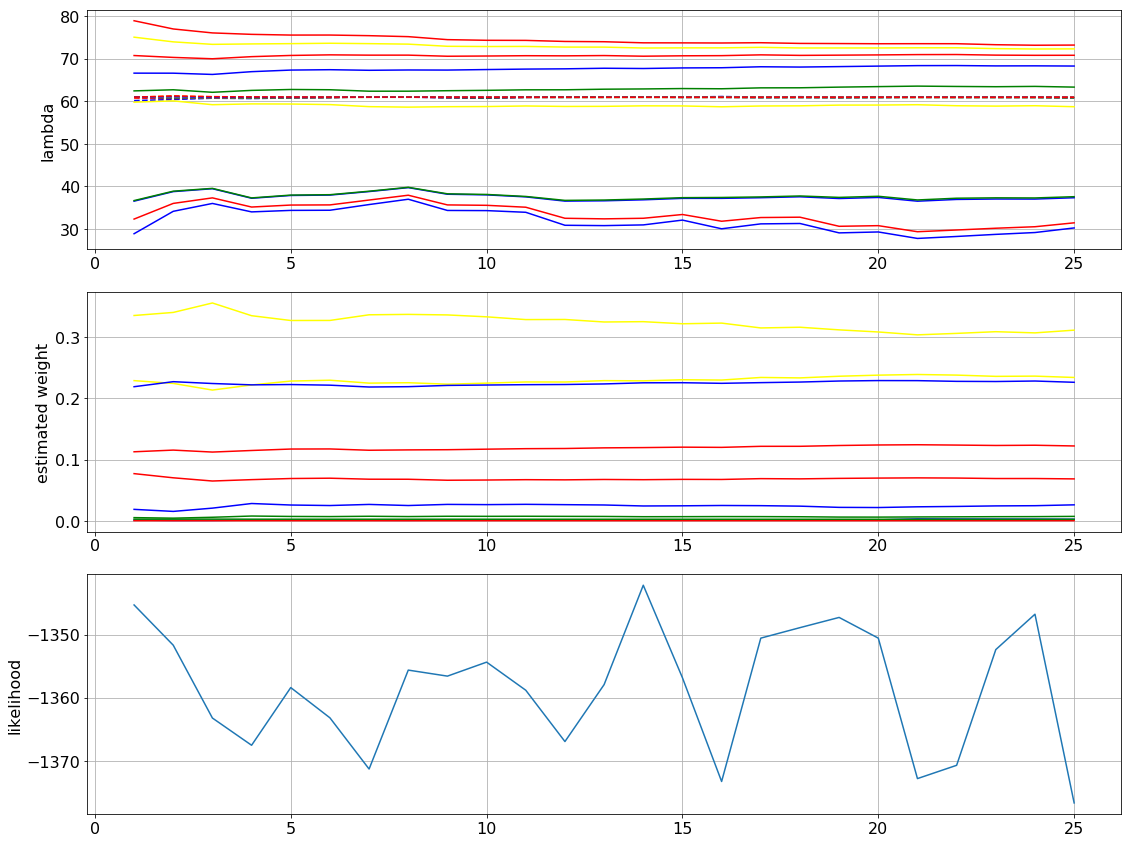

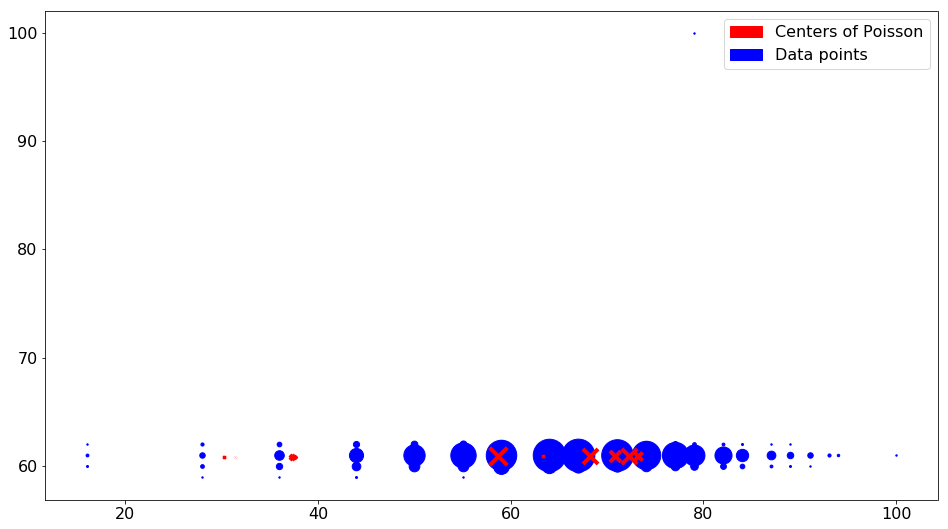

In [24]:
plot_results(onlineEM, legend=False)
plot_points(groupped_data.values[:,:-1], onlineEM)

In [139]:
onlineEM.threshold = 0.00000000000005

In [82]:
result = onlineEM.flag_anomaly(groupped_data.values)
print('total anomalies:', np.sum(result))
anomalies = np.where(result == True)
print(groupped_data.values[anomalies])

total anomalies: 5000
[[98 81 'C0']
 [93 82 'C1']
 [97 82 'C10']
 ..., 
 [94 82 'C97']
 [94 81 'C98']
 [92 82 'C99']]


In [127]:
r = onlineEM.score_anomaly(groupped_data.values)

In [140]:
flags = r < onlineEM.threshold
print(groupped_data.values[flags])

[[40 100 'C404']
 [1 44 'C408']
 [1 46 'C450']
 [1 46 'C474']
 [1 44 'C491']
 [1 46 'C426']
 [1 45 'C451']
 [1 44 'C489']
 [1 44 'C451']
 [1 44 'C478']
 [1 45 'C487']
 [1 48 'C371']
 [1 46 'C401']
 [1 44 'C405']
 [1 46 'C466']
 [1 45 'C483']
 [1 44 'C497']
 [1 46 'C433']
 [1 45 'C440']
 [1 45 'C452']
 [1 45 'C462']
 [1 46 'C491']
 [1 46 'C417']
 [1 45 'C421']
 [1 46 'C446']
 [1 45 'C455']
 [1 45 'C428']
 [1 45 'C482']
 [1 45 'C487']
 [1 44 'C444']
 [1 44 'C485']]


In [33]:
flags[flags == True]

array([], dtype=bool)

In [40]:
onlineEM.score_anomaly([[79, 100, 'C4'],
 [16, 60, 'C299'],
 [16, 61, 'C359'],
 [16, 61, 'C428'],
 [16, 62, 'C134'],
 [16, 60, 'C277'],
 [16, 61, 'C158'],
 [16, 61, 'C179']])

array([  4.23534552e-09,   6.26756036e-09,   6.24738791e-09,
         6.24738791e-09,   3.32587442e-09,   3.40226241e-09,
         6.24738791e-09,   3.39131206e-09])

In [41]:
onlineEM.hosts['C179']

{'category': 5,
 'group': array([  2.22305634e-05,   3.83117492e-03,   2.30255738e-01,
          1.61301446e-02,   3.31498155e-04,   3.05530184e-07,
          2.43341807e-07,   5.77612709e-03,   1.80306250e-01,
          3.05530184e-07,   5.24997713e-05,   3.64589980e-01,
          1.07306230e-05,   8.51128825e-03,   7.73854365e-02,
          5.61299777e-04,   5.28364377e-04,   6.67652520e-04,
          1.02594686e-01,   8.44404423e-03]),
 'n_points': 10}